In [94]:
import statsmodels
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# data cleaning/wrangling
## identifying and handling missing values
* identify, replace, remove, 
* correct data format (float, int...'df.dtypes')
## data standardization
* km/h <-> m/s 

## data normalization
* simple feature scaling, /max
* min-max
* z-score: x-mean/di -3,3

## binning


## indicator variable 

## transfer catogrophic data into one-hot encoding as numerical data

In [14]:
car_dataset = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data' 
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [17]:
df = pd.read_csv(car_dataset, names=headers)

In [21]:
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [22]:
# analysis the missing data
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")    

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

In [23]:
# handle the missing data by replacing them (7 in total)
avg_1 = df["normalized-losses"].astype("float").mean(axis = 0)
df["normalized-losses"].replace(np.nan, avg_1, inplace = True)
avg_2=df['bore'].astype('float').mean(axis=0)
df['bore'].replace(np.nan, avg_2, inplace= True)
avg_3 = df["stroke"].astype("float").mean(axis=0)
df["stroke"].replace(np.nan, avg_3, inplace=True)
avg_4=df['horsepower'].astype('float').mean(axis=0)
df['horsepower'].replace(np.nan, avg_4, inplace= True)
avg_5=df['peak-rpm'].astype('float').mean(axis=0)
df['peak-rpm'].replace(np.nan, avg_5, inplace= True)

In [24]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [25]:
# or
df['num-of-doors'].value_counts().idxmax()

'four'

In [26]:
# replace the missing 'num-of-doors' values by the most frequent 
df["num-of-doors"].replace(np.nan, "four", inplace = True)

In [27]:
# simply drop whole row with NaN in "price" column
df.dropna(subset=["price"], axis=0, inplace = True)

# reset index, because we droped two rows
df.reset_index(drop = True, inplace = True)

In [29]:
# data types
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [30]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df["peak-rpm"] = df["peak-rpm"].astype("float")

In [33]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [36]:
# transform mpg to L/100km by mathematical operation (235 divided by mpg)
# to use a more common unit
df['city-L/100km'] = 235/df["city-mpg"]
df['highway-L/100km'] = 235/df['highway-mpg']

In [42]:
# data normalization using simple feature scaling
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()
df[["height","length","width"]].head()

,height,length,width
0,0.816054,0.811148,0.890278
1,0.816054,0.811148,0.890278
2,0.876254,0.822681,0.909722
3,0.908027,0.848630,0.919444
4,0.908027,0.848630,0.922222


In [40]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476,8.703704
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476,8.703704
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421,9.038462
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667,7.833333
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556,10.681818


In [43]:
# data binning
df["horsepower"]=df["horsepower"].astype(float, copy=True)
binwidth = (max(df["horsepower"])-min(df["horsepower"]))/4
bins = np.arange(min(df["horsepower"]), max(df["horsepower"]), binwidth)
bins

array([ 48. , 101.5, 155. , 208.5])

In [44]:
group_names = ['Low', 'Medium', 'High']
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names,include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111.0,Medium
1,111.0,Medium
2,154.0,Medium
3,102.0,Medium
4,115.0,Medium
5,110.0,Medium
6,110.0,Medium
7,110.0,Medium
8,140.0,Medium
9,101.0,Low


In [46]:
# indicator variables
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'highway-L/100km',
       'horsepower-binned'],
      dtype='object')

In [52]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.rename(columns={'fuel-type-diesel':'gas', 'fuel-type-diesel':'diesel'}, inplace=True)
df = pd.concat([df, dummy_variable_1], axis=1)
df.drop("fuel-type", axis = 1, inplace=True)
df_2 = pd.get_dummies(df["aspiration"])
df_2.rename({'std':'aspiration-std','turbo':'aspiration-turbo'},inplace= True)
df = pd.concat([df, df_2], axis=1)
df.drop("aspiration",axis=1, inplace=True)

In [65]:
# done the claaning part
df.to_csv('clean_df.csv')
df.head()


,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,diesel,gas,std,turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,Medium,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,Medium,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,Medium,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,Medium,0,1,1,0


## Exploratory data analysis
summerize main characteristics, relationships between variables, extract important variables
* Descriptive statistics: describe, value_counts, box_plot, scatter_plo
* Groupby: Pivot table, heatmap
* ANOVA(Analysis of Variance: finding correlation between different groups of a categorical variable): F-test score, p value 
* Correlation: how one variable change changes the other variable (steep -> strong correlation)
* Correlation-statistics:  Pearson correlation(correlation coefficient -1N 0 +1P, p value small0.001->certain), correlation heatmaps

In [67]:
df_test = df[['price','body-style','drive-wheels']]
df_grp = df_test.groupby(['drive-wheels','body-style'],as_index= False).mean()

In [69]:
df_pivot = df_grp.pivot(index="drive-wheels", columns="body-style")
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

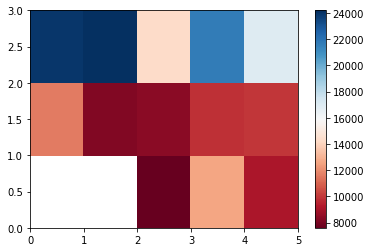

In [75]:
plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

In [88]:
df_anova = df[['make','price']]
df_an_grp = df_anova.groupby(['make'])
df_an_grp.groups

{'alfa-romero': Int64Index([0, 1, 2], dtype='int64'),
 'audi': Int64Index([3, 4, 5, 6, 7, 8], dtype='int64'),
 'bmw': Int64Index([9, 10, 11, 12, 13, 14, 15, 16], dtype='int64'),
 'chevrolet': Int64Index([17, 18, 19], dtype='int64'),
 'dodge': Int64Index([20, 21, 22, 23, 24, 25, 26, 27, 28], dtype='int64'),
 'honda': Int64Index([29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41], dtype='int64'),
 'isuzu': Int64Index([42, 43], dtype='int64'),
 'jaguar': Int64Index([44, 45, 46], dtype='int64'),
 'mazda': Int64Index([47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62,
             63],
            dtype='int64'),
 'mercedes-benz': Int64Index([64, 65, 66, 67, 68, 69, 70, 71], dtype='int64'),
 'mercury': Int64Index([72], dtype='int64'),
 'mitsubishi': Int64Index([73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85], dtype='int64'),
 'nissan': Int64Index([86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101,
             102, 103],
            dtype='int64'),
 'peugot'

In [92]:
an_test_1 = stats.f_oneway(df_an_grp.get_group('honda')['price'], df_an_grp.get_group('subaru')['price'])

In [93]:
an_test_1

F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)

(0, 56243.34359655852)

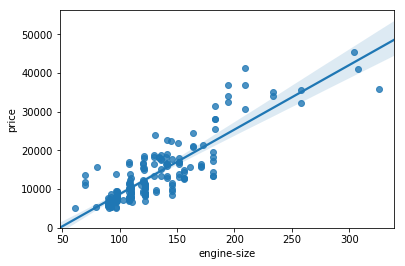

In [104]:
sns.regplot(x="engine-size",y="price", data=df)
plt.ylim(0,)

In [105]:
pearson_co, pearson_p = stats.pearsonr(df['horsepower'], df['price'])

In [106]:
pearson_co

0.8095745670036559

In [107]:
pearson_p

6.36905742825998e-48